CLASIFICACIÓN DE FLORES IRIS - COMPARATIVA DE MÉTODOS ML

[1] CARGANDO DATASET IRIS...

Dimensiones del dataset: (150, 6)
Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

Distribución de clases:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Primeras 5 filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2     

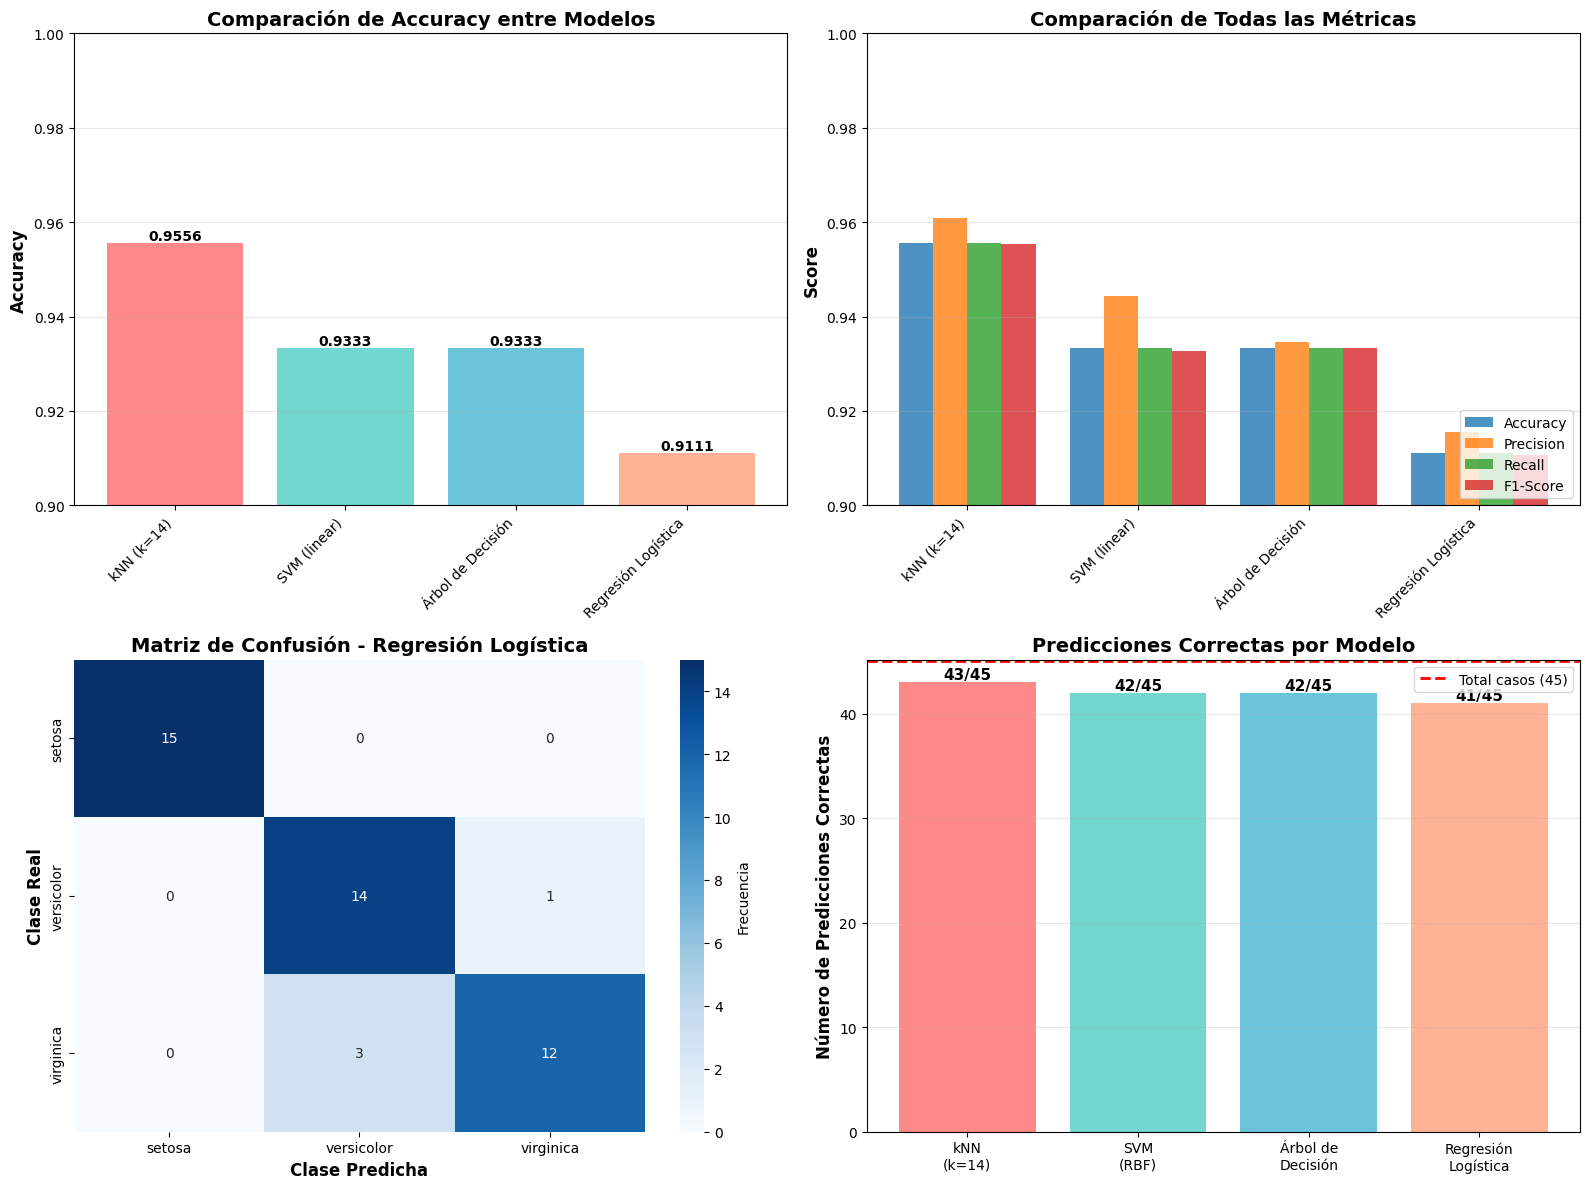

✓ Gráficos generados y guardados

[9] REPORTES DE CLASIFICACIÓN DETALLADOS


kNN:
----------------------------------------------------------------------
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        15
  versicolor     0.8824    1.0000    0.9375        15
   virginica     1.0000    0.8667    0.9286        15

    accuracy                         0.9556        45
   macro avg     0.9608    0.9556    0.9554        45
weighted avg     0.9608    0.9556    0.9554        45


SVM:
----------------------------------------------------------------------
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        15
  versicolor     0.8333    1.0000    0.9091        15
   virginica     1.0000    0.8000    0.8889        15

    accuracy                         0.9333        45
   macro avg     0.9444    0.9333    0.9327        45
weighted avg     0.9444    0.9333    0.9327        45


Árbol d

In [1]:
# ============================================================================
# CLASIFICACIÓN DE FLORES IRIS - COMPARATIVA DE MÉTODOS
# Comparación: kNN, SVM, Árboles de Decisión y Regresión Logística
# ============================================================================

# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Importar los clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import graphviz
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CLASIFICACIÓN DE FLORES IRIS - COMPARATIVA DE MÉTODOS ML")
print("="*70)

# ============================================================================
# 1. CARGAR Y EXPLORAR LOS DATOS
# ============================================================================
print("\n[1] CARGANDO DATASET IRIS...")
iris = load_iris()

# Crear DataFrame para visualización
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(f"\nDimensiones del dataset: {df.shape}")
print(f"Características: {list(iris.feature_names)}")
print(f"Clases: {list(iris.target_names)}")
print(f"\nDistribución de clases:")
print(df['species_name'].value_counts())

# Mostrar primeras filas
print("\nPrimeras 5 filas del dataset:")
print(df.head())

# ============================================================================
# 2. PREPARAR LOS DATOS
# ============================================================================
print("\n[2] PREPARANDO LOS DATOS...")

X = iris.data
y = iris.target

# Dividir en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

# Normalizar los datos (importante para kNN, SVM y Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Datos normalizados con StandardScaler")

# ============================================================================
# 3. ENTRENAR MODELOS - k-NEAREST NEIGHBORS (kNN)
# ============================================================================
print("\n[3] ENTRENANDO MODELO kNN...")

# Buscar mejor valor de k
k_values = range(1, 21)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_values[np.argmax(k_scores)]
print(f"Mejor valor de k: {best_k} (accuracy: {max(k_scores):.4f})")

# Entrenar con el mejor k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print(f"✓ Modelo kNN entrenado (k={best_k})")

# ============================================================================
# 4. ENTRENAR MODELOS - SUPPORT VECTOR MACHINE (SVM)
# ============================================================================
print("\n[4] ENTRENANDO MODELO SVM...")

# Buscar mejores hiperparámetros con GridSearch
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)

print(f"Mejores parámetros SVM: {svm_grid.best_params_}")
print(f"Mejor accuracy en validación: {svm_grid.best_score_:.4f}")

svm_model = svm_grid.best_estimator_
y_pred_svm = svm_model.predict(X_test_scaled)

print("✓ Modelo SVM entrenado")

# ============================================================================
# 5. ENTRENAR MODELOS - ÁRBOL DE DECISIÓN
# ============================================================================
print("\n[5] ENTRENANDO MODELO ÁRBOL DE DECISIÓN...")

# Buscar mejores hiperparámetros
param_grid_tree = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid_tree, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)  # Los árboles no necesitan normalización

print(f"Mejores parámetros Árbol: {tree_grid.best_params_}")
print(f"Mejor accuracy en validación: {tree_grid.best_score_:.4f}")

tree_model = tree_grid.best_estimator_
y_pred_tree = tree_model.predict(X_test)

print("✓ Modelo Árbol de Decisión entrenado")

# ============================================================================
# 6. ENTRENAR MODELOS - REGRESIÓN LOGÍSTICA
# ============================================================================
print("\n[6] ENTRENANDO MODELO REGRESIÓN LOGÍSTICA...")

# Buscar mejores hiperparámetros
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2'],
    'max_iter': [1000]
}

lr_grid = GridSearchCV(LogisticRegression(random_state=42, multi_class='ovr'),
                       param_grid_lr, cv=5, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train)

print(f"Mejores parámetros Regresión Logística: {lr_grid.best_params_}")
print(f"Mejor accuracy en validación: {lr_grid.best_score_:.4f}")

lr_model = lr_grid.best_estimator_
y_pred_lr = lr_model.predict(X_test_scaled)

print("✓ Modelo Regresión Logística entrenado")

# ============================================================================
# 7. EVALUAR TODOS LOS MODELOS
# ============================================================================
print("\n[7] EVALUANDO MODELOS...")

def calcular_metricas(y_true, y_pred, modelo_nombre):
    """Calcula todas las métricas de evaluación"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return {
        'Modelo': modelo_nombre,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4)
    }

# Calcular métricas para todos los modelos
resultados = []
resultados.append(calcular_metricas(y_test, y_pred_knn, f'kNN (k={best_k})'))
resultados.append(calcular_metricas(y_test, y_pred_svm, f'SVM ({svm_grid.best_params_["kernel"]})'))
resultados.append(calcular_metricas(y_test, y_pred_tree, 'Árbol de Decisión'))
resultados.append(calcular_metricas(y_test, y_pred_lr, 'Regresión Logística'))

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)

print("\n" + "="*70)
print("TABLA COMPARATIVA DE RESULTADOS - TODOS LOS MÉTODOS")
print("="*70)
print(df_resultados.to_string(index=False))
print("="*70)

# ============================================================================
# 8. VISUALIZACIÓN DE RESULTADOS
# ============================================================================
print("\n[8] GENERANDO VISUALIZACIONES...")

# Gráfico de barras comparativo
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparación de Accuracy
ax1 = axes[0, 0]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
bars = ax1.bar(df_resultados['Modelo'], df_resultados['Accuracy'], color=colors, alpha=0.8)
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Comparación de Accuracy entre Modelos', fontsize=14, fontweight='bold')
ax1.set_ylim([0.9, 1.0])
ax1.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Gráfico 2: Comparación de todas las métricas
ax2 = axes[0, 1]
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(df_resultados))
width = 0.2

for i, metrica in enumerate(metricas):
    ax2.bar(x + i*width, df_resultados[metrica], width,
            label=metrica, alpha=0.8)

ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
ax2.set_title('Comparación de Todas las Métricas', fontsize=14, fontweight='bold')
ax2.set_xticks(x + width * 1.5)
ax2.set_xticklabels(df_resultados['Modelo'])
ax2.legend(loc='lower right')
ax2.set_ylim([0.9, 1.0])
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Gráfico 3: Matriz de confusión para Regresión Logística
ax3 = axes[1, 0]
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names, ax=ax3, cbar_kws={'label': 'Frecuencia'})
ax3.set_ylabel('Clase Real', fontsize=12, fontweight='bold')
ax3.set_xlabel('Clase Predicha', fontsize=12, fontweight='bold')
ax3.set_title('Matriz de Confusión - Regresión Logística', fontsize=14, fontweight='bold')

# Gráfico 4: Comparación visual de predicciones correctas
ax4 = axes[1, 1]
modelos_nombres = [f'kNN\n(k={best_k})', 'SVM\n(RBF)', 'Árbol de\nDecisión', 'Regresión\nLogística']
predicciones_correctas = [
    np.sum(y_pred_knn == y_test),
    np.sum(y_pred_svm == y_test),
    np.sum(y_pred_tree == y_test),
    np.sum(y_pred_lr == y_test)
]

bars = ax4.bar(modelos_nombres, predicciones_correctas, color=colors, alpha=0.8)
ax4.axhline(y=len(y_test), color='red', linestyle='--', linewidth=2, label=f'Total casos ({len(y_test)})')
ax4.set_ylabel('Número de Predicciones Correctas', fontsize=12, fontweight='bold')
ax4.set_title('Predicciones Correctas por Modelo', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}/{len(y_test)}', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('comparacion_modelos_iris.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráficos generados y guardados")

# ============================================================================
# 9. REPORTES DETALLADOS POR MODELO
# ============================================================================
print("\n[9] REPORTES DE CLASIFICACIÓN DETALLADOS")
print("\n" + "="*70)

modelos_info = [
    ('kNN', y_pred_knn),
    ('SVM', y_pred_svm),
    ('Árbol de Decisión', y_pred_tree),
    ('Regresión Logística', y_pred_lr)
]

for nombre, predicciones in modelos_info:
    print(f"\n{nombre}:")
    print("-" * 70)
    print(classification_report(y_test, predicciones,
                                target_names=iris.target_names,
                                digits=4))

# ============
